In [0]:
#@title Imports


# !wget http://openi.nlm.nih.gov/imgs/collections/ChinaSet_AllFiles.zip
# !unzip ChinaSet_AllFiles.zip
!pip install Pillow==4.0.0
!pip install Pillow==4.1.1
!pip install PIL
!pip install image
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch
import numpy as np
import numpy
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
  
import matplotlib.pyplot as plt
%matplotlib inline


from PIL import Image
def register_extension(id, extension): Image.EXTENSION[extension.lower()] = id.upper()
Image.register_extension = register_extension
def register_extensions(id, extensions): 
  for extension in extensions: register_extension(id, extension)
Image.register_extensions = register_extensions

    100% |████████████████████████████████| 5.6MB 6.6MB/s 
torchvision 0.2.2.post3 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
imgaug 0.2.8 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
fastai 1.0.51 has requirement numpy>=1.15, but you'll have numpy 1.14.6 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
  Found existing installation: Pillow 4.1.1
    Uninstalling Pillow-4.1.1:
      Successfully uninstalled Pillow-4.1.1


    100% |████████████████████████████████| 5.7MB 8.1MB/s 
imgaug 0.2.8 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
fastai 1.0.51 has requirement numpy>=1.15, but you'll have numpy 1.14.6 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


  Could not find a version that satisfies the requirement PIL (from versions: )
No matching distribution found for PIL
  HTTP error 403 while getting http://download.pytorch.org/whl/cu100/torch-0.4.1-cp36-cp36m-linux_x86_64.whl
  Could not install requirement torch==0.4.1 from http://download.pytorch.org/whl/cu100/torch-0.4.1-cp36-cp36m-linux_x86_64.whl because of error 403 Client Error: Forbidden for url: http://download.pytorch.org/whl/cu100/torch-0.4.1-cp36-cp36m-linux_x86_64.whl
Could not install requirement torch==0.4.1 from http://download.pytorch.org/whl/cu100/torch-0.4.1-cp36-cp36m-linux_x86_64.whl because of HTTP error 403 Client Error: Forbidden for url: http://download.pytorch.org/whl/cu100/torch-0.4.1-cp36-cp36m-linux_x86_64.whl for URL http://download.pytorch.org/whl/cu100/torch-0.4.1-cp36-cp36m-linux_x86_64.whl


In [0]:
#@title Dynamic fields 

batch_size = 80 #@param {type:"slider", min:4, max:100, step:1}

load_pretrained_model = False #@param {type:"boolean"}

train_on_gpu =True #@param {type:"boolean"}

valid_size =0.2 #@param {type:"slider", min:0.1, max:0.5, step:0.05}


In [0]:
#@title Mount drive 

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#@title Transform and Load data 

transform =  transforms.Compose([
#     transforms.Grayscale(num_output_channels=1),
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.5],[0.5])
]
)
dataset =  datasets.ImageFolder("gdrive/My Drive/tb",transform)
dataloader = torch.utils.data.DataLoader(dataset,batch_size = batch_size ,shuffle = True)


print(dataset)
print(len(dataloader))

Dataset ImageFolder
    Number of datapoints: 800
    Root Location: gdrive/My Drive/tb
    Transforms (if any): Compose(
                             Resize(size=255, interpolation=PIL.Image.BILINEAR)
                             CenterCrop(size=(224, 224))
                             ToTensor()
                             Normalize(mean=[0.5], std=[0.5])
                         )
    Target Transforms (if any): None
10


In [0]:
!pip install Pillow==4.1.1

In [0]:
import matplotlib.ticker as plticker

def helper_imshow_gray(image, ax=None, title=None, normalize=False):
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy()
    if normalize:
        mean = np.array([0.5])
        std = np.array([0.5])
        image = std * image + mean
        image = np.clip(image, 0, 1)
    ax.imshow(image,cmap='gray') 
    ax.set_title(title)

    return ax

In [0]:
data_iter = iter(dataloader)
images, labels = next(data_iter)
print(images.size())


torch.Size([80, 3, 224, 224])


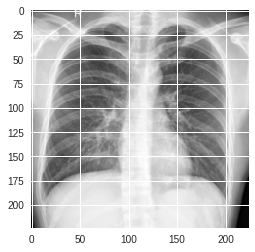

In [0]:
helper_imshow_gray(images[1][0])

In [0]:
#@title split train and test


num_train = len(dataset)
num_train = 800
num_workers = 0 
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_workers)

classes = ['postive','normal']

print(len(train_loader))
print(len(valid_loader))

8
2


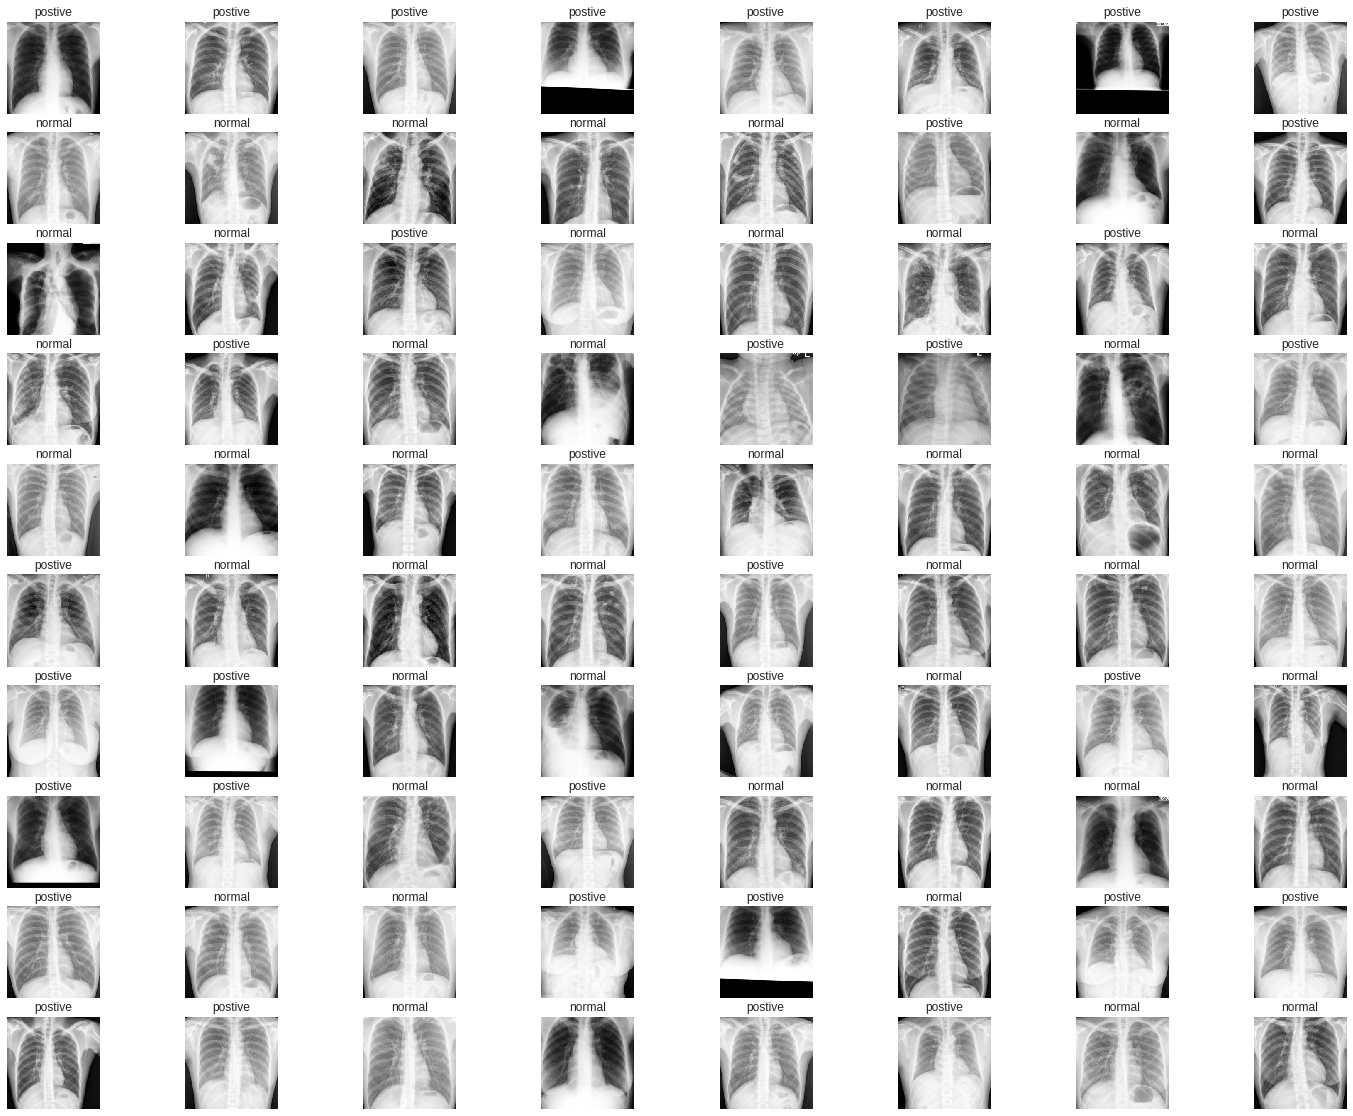

In [0]:
#@title Batch images check
fig = plt.figure(figsize=(25, 20))


for idx in np.arange(batch_size):
    ax = fig.add_subplot(10, batch_size/10, idx+1, xticks=[], yticks=[])
    helper_imshow_gray(images[idx][0],ax,title = classes[labels[idx]])


In [0]:
#@title Define model

import torch.nn as nn
import torch.nn.functional as F

def init_weights(m):
    if isinstance(m, nn.Conv2d) or isinstance(m,nn.Linear):
        torch.nn.init.normal_(m.weight,0,0.01)
        if m.bias is not None:
            pass
#             torch.nn.init.normal_(m.bias)
    

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 5, padding=2 ,stride=2)
        self.conv2 = nn.Conv2d(32, 32, 5, padding=2 ,stride=2)
        self.conv3 = nn.Conv2d(32, 32, 5, padding=2 ,stride=1)
        self.conv4 = nn.Conv2d(32, 64, 5, padding=2 ,stride=2)
        self.conv5 = nn.Conv2d(64, 64, 5, padding=2 ,stride=1)
        self.conv6 = nn.Conv2d(64, 64, 5, padding=2 ,stride=2)
        self.conv7 = nn.Conv2d(64, 64, 5, padding=2 ,stride=2)


        self.fc1 = nn.Linear(3136, 1024)
        self.fc2 = nn.Linear(1024, 256)
        self.fc3 = nn.Linear(256,2)
        self.dropout = nn.Dropout(0.5)
        
        


    def forward(self, x):
        x = (F.relu(self.conv1(x)))
        x = (F.relu(self.conv2(x)))
        x = (F.relu(self.conv3(x)))
        x = (F.relu(self.conv4(x)))
        x = (F.relu(self.conv5(x)))
        x = (F.relu(self.conv6(x)))
        x = (F.relu(self.conv7(x)))   
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        
        x = self.dropout(x)
        x = self.fc3(x)
        return x

model = Net()
print(model)
# model.apply(init_weights)
state_dict = torch.load('gdrive/My Drive/model_tb80.pt')
model.load_state_dict(state_dict)
if train_on_gpu:
    model.cuda()

Net(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
  (conv2): Conv2d(32, 32, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
  (conv3): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv4): Conv2d(32, 64, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
  (conv5): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv6): Conv2d(64, 64, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
  (conv7): Conv2d(64, 64, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
  (fc1): Linear(in_features=3136, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=2, bias=True)
  (dropout): Dropout(p=0.5)
)


In [0]:
#@title Load saved model def loss/optimizer

import torch.optim as optim

criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(),lr=0.0001)
import os

In [0]:
#@title Train and validate

n_epochs = 300 
import numpy as np
valid_loss_min = np.Inf 
train_on_gpu = True
for epoch in range(1, n_epochs+1):

    train_loss = 0.0
    valid_loss = 0.0
    model.train()
    for data, target in train_loader:
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()

        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*data.size(0)
        

        
        
        
    model.eval()
    for data, target in valid_loader:
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        output = model(data)
        loss = criterion(output, target)
        valid_loss += loss.item()*data.size(0)
    
    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = valid_loss/len(valid_loader.dataset)
        
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,valid_loss))
        torch.save(model.state_dict(), 'model_tb_gray_norm_new.pt')
        os.system("cp model_tb_gray_norm_new.pt gdrive/'My Drive'/model_tb_gray_norm_new.pt")
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 0.554489 	Validation Loss: 0.138617
Validation loss decreased (inf --> 0.138617).  Saving model ...
Epoch: 2 	Training Loss: 0.554554 	Validation Loss: 0.138611
Validation loss decreased (0.138617 --> 0.138611).  Saving model ...
Epoch: 3 	Training Loss: 0.554771 	Validation Loss: 0.138612
Epoch: 4 	Training Loss: 0.554603 	Validation Loss: 0.138601
Validation loss decreased (0.138611 --> 0.138601).  Saving model ...
Epoch: 5 	Training Loss: 0.554872 	Validation Loss: 0.138583
Validation loss decreased (0.138601 --> 0.138583).  Saving model ...
Epoch: 6 	Training Loss: 0.554318 	Validation Loss: 0.138534
Validation loss decreased (0.138583 --> 0.138534).  Saving model ...
Epoch: 7 	Training Loss: 0.553945 	Validation Loss: 0.138273
Validation loss decreased (0.138534 --> 0.138273).  Saving model ...
Epoch: 8 	Training Loss: 0.551842 	Validation Loss: 0.136394
Validation loss decreased (0.138273 --> 0.136394).  Saving model ...
Epoch: 9 	Training Loss: 0.540625 

In [0]:
#@title Track loss and test
test_loss = 0.0
class_correct = list(0. for i in range(2))
class_total = list(0. for i in range(2))

with torch.no_grad():
  for data, target in dataloader:
      if train_on_gpu:
          data, target = data.cuda(), target.cuda()
      output = model(data)
      loss = criterion(output, target)
      test_loss += loss.item()*data.size(0)
      _, pred = torch.max(output, 1)    
      correct_tensor = pred.eq(target.data.view_as(pred))
      correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
      for i in range(data.size(0)):
          label = target.data[i]
          class_correct[label] += correct[i].item()
          class_total[label] += 1

  test_loss = test_loss/len(dataloader.dataset)
  print('Test Loss: {:.6f}\n'.format(test_loss))

  for i in range(2):
      if class_total[i] > 0:
          print('over all  Accuracy of %5s: %2d%% (%2d/%2d)' % (
              classes[i], 100 * class_correct[i] / class_total[i],
              np.sum(class_correct[i]), np.sum(class_total[i])))
      else:
          print('over all Accuracy of %5s: N/A (no training examples)' % (classes[i]))

  print('\nOver all Accuracy : %2d%% (%2d/%2d)' % (
      100. * np.sum(class_correct) / np.sum(class_total),
  #@title Load saved model def loss/optimizer
      np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.341045

over all  Accuracy of postive: 90% (369/406)
over all  Accuracy of normal: 81% (322/394)

Over all Accuracy : 86% (691/800)


In [46]:
#@title Track loss and test
test_loss = 0.0
class_correct = list(0. for i in range(2))
class_total = list(0. for i in range(2))

with torch.no_grad():
  for data, target in dataloader:
      if train_on_gpu:
          data, target = data.cuda(), target.cuda()
      output = model(data)
      loss = criterion(output, target)
      test_loss += loss.item()*data.size(0)
      _, pred = torch.max(output, 1)    
      correct_tensor = pred.eq(target.data.view_as(pred))
      correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
      for i in range(data.size(0)):
          label = target.data[i]
          class_correct[label] += correct[i].item()
          class_total[label] += 1

  test_loss = test_loss/len(dataloader.dataset)
  print('Test Loss: {:.6f}\n'.format(test_loss))

  for i in range(2):
      if class_total[i] > 0:
          print('over all  Accuracy of %5s: %2d%% (%2d/%2d)' % (
              classes[i], 100 * class_correct[i] / class_total[i],
              np.sum(class_correct[i]), np.sum(class_total[i])))
      else:
          print('over all Accuracy of %5s: N/A (no training examples)' % (classes[i]))

  print('\nOver all Accuracy : %2d%% (%2d/%2d)' % (
      100. * np.sum(class_correct) / np.sum(class_total),
      np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.331857

over all  Accuracy of postive: 89% (363/406)
over all  Accuracy of normal: 84% (333/394)

Over all Accuracy : 87% (696/800)


In [47]:
#@title Track loss and test
test_loss = 0.0
class_correct = list(0. for i in range(2))
class_total = list(0. for i in range(2))

with torch.no_grad():
  for data, target in train_loader:
      if train_on_gpu:
          data, target = data.cuda(), target.cuda()
      output = model(data)
      loss = criterion(output, target)
      test_loss += loss.item()*data.size(0)
      _, pred = torch.max(output, 1)    
      correct_tensor = pred.eq(target.data.view_as(pred))
      correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
      for i in range(data.size(0)):
          label = target.data[i]
          class_correct[label] += correct[i].item()
          class_total[label] += 1

  test_loss = test_loss/len(train_loader.dataset)
  print('Test Loss: {:.6f}\n'.format(test_loss))

  for i in range(2):
      if class_total[i] > 0:
          print('over all  Accuracy of %5s: %2d%% (%2d/%2d)' % (
              classes[i], 100 * class_correct[i] / class_total[i],
              np.sum(class_correct[i]), np.sum(class_total[i])))
      else:
          print('over all Accuracy of %5s: N/A (no training examples)' % (classes[i]))

  print('\nOver all Accuracy : %2d%% (%2d/%2d)' % (
      100. * np.sum(class_correct) / np.sum(class_total),
      np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.256935

over all  Accuracy of postive: 88% (283/318)
over all  Accuracy of normal: 84% (272/322)

Over all Accuracy : 86% (555/640)


In [48]:
#@title Track loss and test
test_loss = 0.0
class_correct = list(0. for i in range(2))
class_total = list(0. for i in range(2))

with torch.no_grad():
  for data, target in valid_loader:
      if train_on_gpu:
          data, target = data.cuda(), target.cuda()
      output = model(data)
      loss = criterion(output, target)
      test_loss += loss.item()*data.size(0)
      _, pred = torch.max(output, 1)    
      correct_tensor = pred.eq(target.data.view_as(pred))
      correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
      for i in range(data.size(0)):
          label = target.data[i]
          class_correct[label] += correct[i].item()
          class_total[label] += 1

  test_loss = test_loss/len(valid_loader.dataset)
  print('Test Loss: {:.6f}\n'.format(test_loss))

  for i in range(2):
      if class_total[i] > 0:
          print('over all  Accuracy of %5s: %2d%% (%2d/%2d)' % (
              classes[i], 100 * class_correct[i] / class_total[i],
              np.sum(class_correct[i]), np.sum(class_total[i])))
      else:
          print('over all Accuracy of %5s: N/A (no training examples)' % (classes[i]))

  print('\nOver all Accuracy : %2d%% (%2d/%2d)' % (
      100. * np.sum(class_correct) / np.sum(class_total),
      np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.069177

over all  Accuracy of postive: 93% (82/88)
over all  Accuracy of normal: 77% (56/72)

Over all Accuracy : 86% (138/160)
